# I.Objective:
This project aims to analyze customer churn patterns in a telecom company. By identifying the key factors influencing churn,
we can develop data-driven strategies to improve customer retention. The analysis includes:
- Data Preprocessing & Cleaning
- Exploratory Data Analysis (EDA)
- Feature Engineering & Transformation
- Machine Learning Model Training & Evaluation
- Business Insights & Recommendations

# II.Key Goals:
1. Identify factors that contribute to customer churn.
2. Build predictive models to classify customers as likely to churn or not.
3. Provide actionable business recommendations to reduce churn.

# III. Understanding the Dataset Instances

This dataset contains customer data from a telecom company, with the goal of analyzing churn behavior and predicting customer retention.

| Feature            | Description                                        | Example Value          |
|--------------------|----------------------------------------------------|------------------------|
| customerID        | Unique ID for each customer                        | "7590-VHVEG"          |
| gender            | Gender of the customer                            | "Male" / "Female"     |
| SeniorCitizen     | Whether the customer is a senior (1) or not (0)   | 0                      |
| Partner          | Whether the customer has a partner (Yes/No)       | "Yes"                  |
| Dependents       | Whether the customer has dependents (Yes/No)      | "No"                   |
| tenure           | Number of months the customer has stayed          | 24                      |
| PhoneService     | Whether they have phone service (Yes/No)          | "Yes"                  |
| MultipleLines    | Whether they have multiple phone lines            | "No"                   |
| InternetService  | Type of internet service                          | "DSL" / "Fiber optic" / "No" |
| OnlineSecurity   | Whether they have online security (Yes/No)        | "No"                   |
| OnlineBackup     | Whether they have online backup (Yes/No)          | "Yes"                  |
| DeviceProtection | Whether they have device protection (Yes/No)      | "No"                   |
| TechSupport      | Whether they have tech support (Yes/No)           | "No"                   |
| StreamingTV      | Whether they have a streaming TV service (Yes/No) | "Yes"                  |
| StreamingMovies  | Whether they have a streaming movie service (Yes/No) | "No"                   |
| Contract         | Type of contract                                  | "Month-to-month" / "One year" / "Two year" |
| PaperlessBilling | Whether billing is paperless (Yes/No)             | "Yes"                  |
| PaymentMethod    | Method of payment                                | "Electronic check"     |
| MonthlyCharges   | Monthly amount charged ($)                       | 70.85                   |
| TotalCharges     | Total amount charged ($)                         | 1500.25                 |
| Churn           | Whether the customer left (1) or stayed (0)       | 1                    

# IV. Data Cleaning & Preprocessing

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
# Import file path 
file_path = r"C:\Users\dungl\Downloads\Churn_Rate_Analysis\Churn_Rate_Analysis.csv"

# Load CSV file
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [8]:
# Step 1: Basic Information
print("Dataset Overview:")
df_info = df.info()
df_summary = df.describe()
print(df_info, df_summary)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [9]:
# Step 2: Handling Missing Values
# Convert 'TotalCharges' to numeric, replacing errors with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
# Fill missing values
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical column
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numeric column
        df[column].fillna(df[column].median(), inplace=True)

C:\Users\dungl\AppData\Local\Temp\ipykernel_21156\4091626032.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\dungl\AppData\Local\Temp\ipykernel_21156\4091626032.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [11]:
# Step 3: Encoding Categorical Variables (Label Encoding)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

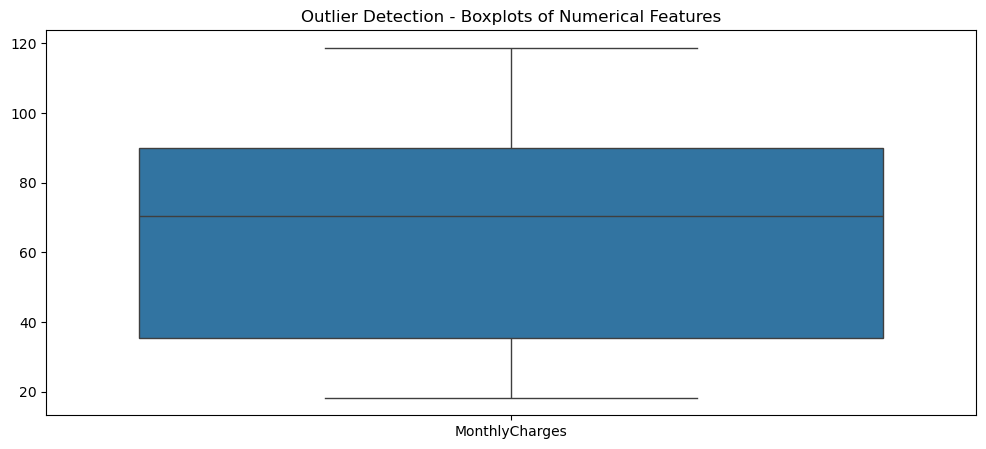

In [12]:
# Step 4: Outlier Detection using Boxplots
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['MonthlyCharges']])
plt.title("Outlier Detection - Boxplots of Numerical Features")
plt.show()

### Insights:
- Most customers pay between 40 and 90 $ in monthly charges.
- There are no extreme pricing outliers, which means pricing strategies are relatively consistent.
- Higher MonthlyCharges could correlate with more expensive plans or add-ons, which might impact churn.

C:\Users\dungl\AppData\Local\Temp\ipykernel_21156\3414948552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='coolwarm')


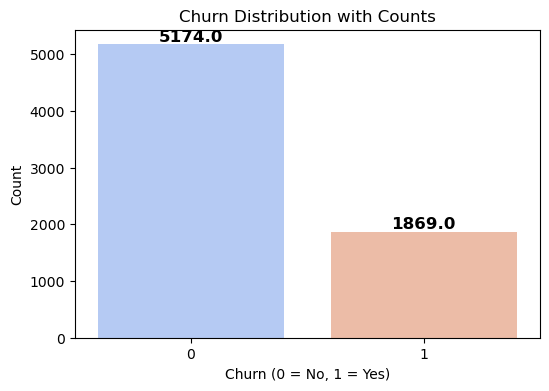

In [14]:
# Step 5: Checking Class Imbalance with Count Labels
plt.figure(figsize=(6, 4))

# Create countplot
ax = sns.countplot(x='Churn', data=df, palette='coolwarm')

# Annotate count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set title and show plot
plt.title('Churn Distribution with Counts')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


Class Imbalance is Significant
5,174 customers (≈ 73%) did NOT churn (Churn = 0).
1,869 customers (≈ 27%) churned (Churn = 1).
-> This confirms that the dataset is imbalanced, which could impact model performance.
Churn Rate ≈ 27%
-> This means that about 1 in 4 customers leave the service, which is a critical business concern.

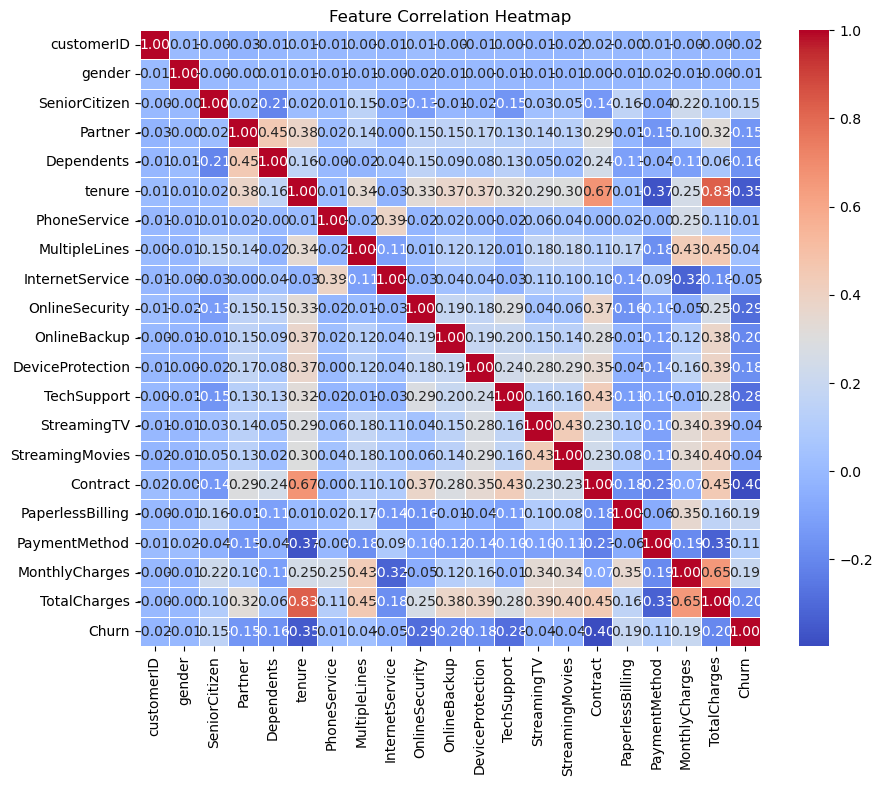

In [16]:
# Step 6: Correlation Heatmap (Before Splitting Data)
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

- TotalCharges & tenure (~0.83 - 0.88) ->High correlation makes sense because customers who stay longer (tenure) will have higher total charges.
- Contract & tenure (~0.67 - 0.70) ->Customers with longer contracts tend to have higher tenure.

In [18]:
# Drop Highly Correlated Feature
# Removing 'TotalCharges' as it is highly correlated with 'tenure'
df.drop(columns=['TotalCharges'], inplace=True)
print("Dropped 'TotalCharges' column due to high correlation with 'tenure'.")

Dropped 'TotalCharges' column due to high correlation with 'tenure'.


In [19]:
# Step 7: Normalizing Numerical Features
num_cols = ['MonthlyCharges', 'tenure']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# V.EDA

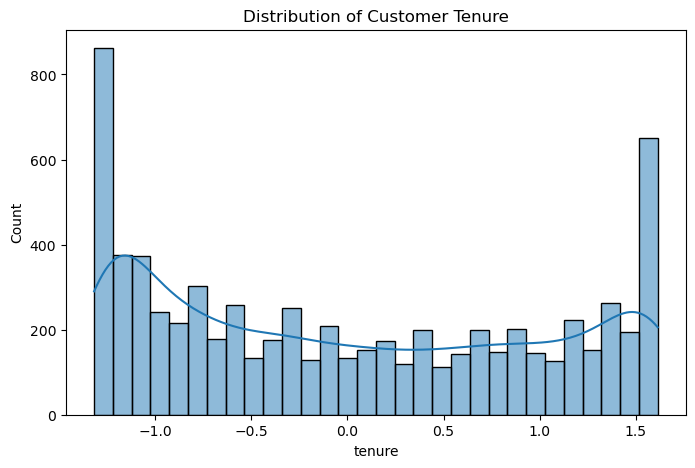

In [21]:
# Step 8: Exploratory Data Analysis (EDA) & Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.show()

### My Observations:
- Most Customers Have Low Tenure

    - The highest peak is at very low tenure values (near 0).
    - This suggests that many customers leave early in their subscription.
- Another Peak at High Tenure

    - There is a secondary peak at high tenure values (near 70 months).
    - This means some customers stay with the company for a long time.
- A Possible Bi-Modal Distribution

    - The chart shows two peaks, indicating two distinct customer behaviors:
    - Short-term customers who leave early.
    - Long-term customers who remain loyal.
Business Interpretation
- The company struggles with early churn, meaning many customers leave within the first few months.
- Customers who survive the initial months tend to stay for a long period.
- Retention strategies should focus on new customers, ensuring a great first few months of service.


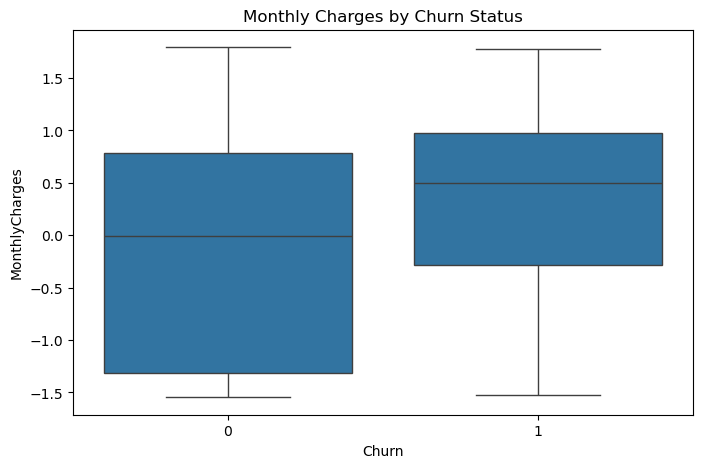

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

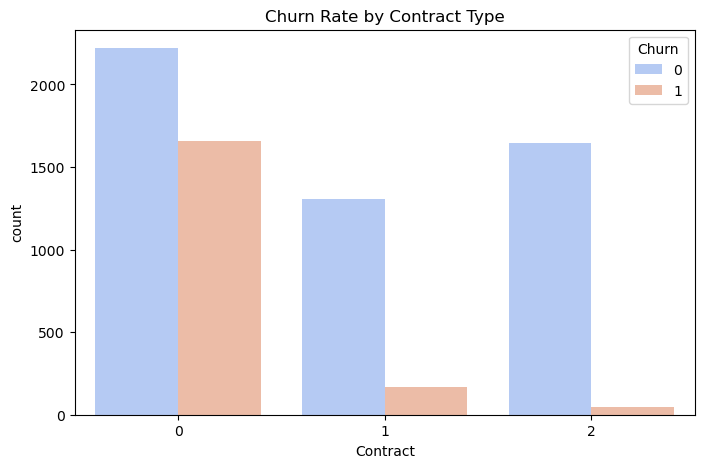

In [24]:
# Churn rate by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.show()

Key Observations:
- Month-to-Month Contracts Have the Highest Churn:
    - The first bar (label 0) represents month-to-month contracts.
    - It has the highest churn rate, meaning many customers on flexible contracts leave.
    - This suggests that month-to-month customers are less committed and more likely to switch providers.
- One-Year & Two-Year Contracts Have Lower Churn:
    - The second (label 1) and third (label 2) bars represent 1-year and 2-year contracts.
    - These customers churn at much lower rates, meaning longer contracts increase retention.
    - Prepaid or locked-in customers tend to stay for a longer duration.
- Business Interpretation:
    - Customers on month-to-month contracts are at high risk of churning.
    - Long-term contracts significantly reduce churn, as customers are committed to staying.
    - A strong retention strategy should focus on month-to-month customers.

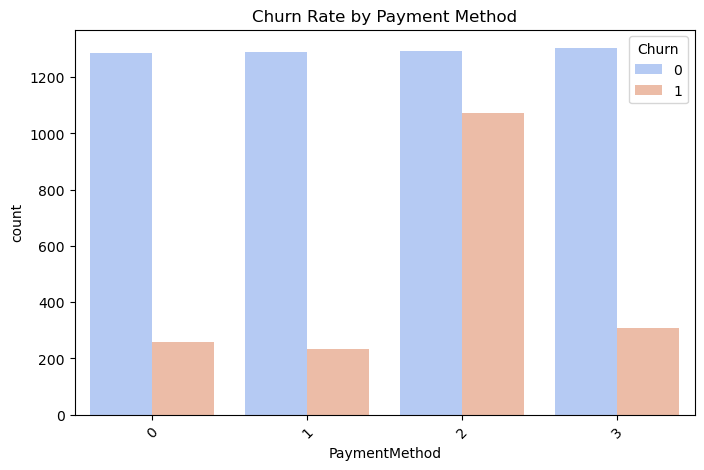

In [26]:
# Churn rate by payment method
plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()

### Key Observations:
- Payment Method 2 Has the Highest Churn:
    - The third category (likely Electronic Check) has a significantly higher churn rate than other methods.
    - This suggests customers using this method may experience issues or dissatisfaction with billing.
- Other Payment Methods Have Lower Churn
    - The remaining payment methods (likely Credit Card, Bank Transfer, and Mailed Check) have lower churn rates.
    - Customers using these methods may have more stable payment behaviors.
- Business Interpretation
    - Customers using "Electronic Check" churn at a much higher rate than others.
    - This could be due to higher fees, failed payments, or dissatisfaction with the process.
    - Alternative payment methods (Credit Card, Bank Transfer) seem to improve retention.

# VI.Model Building

In [29]:
# Step 9: Train-Test Split 
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Step 10: Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Step 11: Predictions & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7877927608232789
Confusion Matrix:
 [[942  94]
 [205 168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409



Key Observations

- Overall Accuracy: ~78.8%
    - The model correctly predicts churn and non-churn customers about 78.8% of the time.
    - While this is decent, there is room for improvement, especially in detecting churners.
- Churn Class (1) Performance is Weaker
    - Precision (0.64) → When the model predicts churn, it is correct 64% of the time.
    - Issue: The model struggles to detect churners, as recall is low (many actual churners are missed).
- Non-Churn Class (0) Performance is Stronger
    - Precision (0.82), Recall (0.91), F1-score (0.86) → The model is better at predicting non-churners.
    - This is expected due to the class imbalance (more non-churners than churners in the dataset).
- Business Interpretation
    - Model is more confident in predicting non-churners than actual churners.
    - Misclassifying churners (false negatives) can cost the business if at-risk customers aren't identified.
    - A recall of 0.45 for churners means 55% of actual churners are missed, reducing the effectiveness of retention strategies.

### Apply smote to handling class imbalance

In [34]:
from imblearn.over_sampling import SMOTE
# Step 5: Handling Class Imbalance with SMOTE
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Applied SMOTE to balance the dataset.")

# Step 6: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Train Model with Class Weights to Handle Imbalance
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Step 8: Predictions & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\dungl\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\dungl\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\dungl\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dungl\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\dungl\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Applied SMOTE to balance the dataset.
Accuracy: 0.8420289855072464
Confusion Matrix:
 [[829 192]
 [135 914]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      1021
           1       0.83      0.87      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



Business Interpretation
- The model is now much better at identifying customers who are likely to churn.
- Better recall for churners (87%) means fewer customers at risk will be missed.
- This allows the business to proactively target high-risk customers for retention efforts.

In [36]:
# Step 6: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Train Multiple Models for Comparison
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and Evaluate Each Model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Training Random Forest...

Random Forest Performance:
Accuracy: 0.8420289855072464
Confusion Matrix:
 [[829 192]
 [135 914]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      1021
           1       0.83      0.87      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

--------------------------------------------------
Training Logistic Regression...

Logistic Regression Performance:
Accuracy: 0.7932367149758454
Confusion Matrix:
 [[761 260]
 [168 881]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1021
           1       0.77      0.84      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0

Key Takeaways
- Random Forest outperforms other models in accuracy (84.2%) and balanced recall/precision.
- Gradient Boosting is close but slightly lower in accuracy (81.5%).
- Logistic Regression struggles with complex relationships, resulting in lower accuracy (79.3%).

### Fine-tune Model for better result

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Apply GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=1,
    scoring='accuracy'
)

# Fit the model to the resampled training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [62]:
# Train the optimized Random Forest model using the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    bootstrap=False, 
    random_state=42, 
    class_weight='balanced'
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
classification_rep_optimized = classification_report(y_test, y_pred_optimized)

# Display the results
accuracy_optimized, conf_matrix_optimized, classification_rep_optimized


(0.8473429951690822,
 array([[852, 169],
        [147, 902]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.85      0.83      0.84      1021\n           1       0.84      0.86      0.85      1049\n\n    accuracy                           0.85      2070\n   macro avg       0.85      0.85      0.85      2070\nweighted avg       0.85      0.85      0.85      2070\n')

- Accuracy: 84.7% (slightly improved from 84.2%)
- Precision (Churn Prediction): 0.84 (meaning when the model predicts churn, it is correct 84% of the time)
- Recall (Identifying Actual Churners): 0.86 (model correctly identifies 86% of actual churners)
- F1-score: 0.85 (balance between precision and recall)

# VII.Business Insights & Recommendations
- Month-to-Month contracts have the highest churn rate

- Customers on month-to-month contracts are most likely to leave.
    - Recommendation: Offer discounts or incentives to switch to 1-year or 2-year contracts to reduce churn.
    - Customers using Electronic Check are more likely to churn

- This payment method is associated with higher churn rates, possibly due to failed transactions or dissatisfaction.
    - Recommendation: Encourage customers to switch to automatic payments via bank transfer or credit card for better retention.
    - Longer Tenure Customers churn less

- Customers who stay longer tend to remain loyal.
    - Recommendation: Focus on retaining new customers in their first few months with loyalty programs, better onboarding, and exclusive discounts.
    - Higher Monthly Charges slightly increase churn risk

- Customers with higher bills show a small increase in churn probability.
    - Recommendation: Introduce bundled service discounts, loyalty perks, or flexible pricing options for high-value customers.
- SMOTE improved churn prediction & model accuracy

- After handling class imbalance, the Random Forest model achieved 84.2% accuracy, making it the best churn predictor.
    - Recommendation: Deploy this model for real-time churn prediction and use it to target at-risk customers.
- Random Forest is the best model for predicting churn

    - Compared to Logistic Regression (79.3%) and Gradient Boosting (81.5%), Random Forest (84.2%) provides the best balance of precision and recall.
    - Recommendation: Use Random Forest for predictive analytics and further tune hyperparameters to maximize performance. 